Set-up Tools dan Library

In [ ]:
#Import python packages dan library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from fbprophet import Prophet
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
!pip install pyramid-arima
from pyramid.arima import auto_arima
std=StandardScaler()



     |████████████████████████████████| 604kB 6.0MB/s 


In [ ]:
#Membaca CSV Data
datacovid = pd.read_csv('/content/drive/MyDrive/Pemlan SEKUY/Data COVID/Data terbaru/1Desember-statistik.csv')

#  **Part 1 :Filter dan Cleaning Data**

Di tahap ini, yang kami lakukan adalah :
1. Mengganti format tanggal dengan format tanggal pandas
2. mengganti index dengan *feature* tanggal
3. *drop* feature yang tidak digunakan untuk analisis dan visualisasi data

In [ ]:
#Membaca Informasi dataframe
datacovid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 49 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         274 non-null    object 
 1   Kasus baru                                         274 non-null    object 
 2   Kasus Impor                                        10 non-null     float64
 3   Kasus Lokal                                        10 non-null     float64
 4   Total kasus                                        274 non-null    int64  
 5   Kasus aktif                                        274 non-null    object 
 6   % kasus aktif                                      274 non-null    object 
 7   Sembuh
(baru)                                      274 non-null    object 
 8   Sembuh                                             274 non-null    object 
 9   Tingkat ke

In [ ]:
datacovid.rename( columns={'Unnamed: 0':'tanggal'}, inplace=True )
datacovid["tanggal"]=pd.to_datetime(datacovid["tanggal"])
datacovid


,tanggal,Kasus baru,Kasus Impor,Kasus Lokal,Total kasus,Kasus aktif,% kasus aktif,Sembuh\n(baru),Sembuh,Tingkat kesembuhan (seluruh kasus),Tingkat kesembuhan (closed cases),Meninggal\n(baru),Meninggal\nDunia,Tingkat kematian (seluruh kasus),Tingkat kematian (closed cases),PDP,ODP,Suspek aktif,Jumlah spesimen diperiksa (dari 1 April),Jumlah orang diperiksa,Negatif,Positif \n(=C),Dalam Proses,Spesimen,Orang yang dites,Jumlah test/juta penduduk,Test/Positif,Jumlah org yg dites / positif,Jumlah Test/Positif harian,Positif / Jumlah Tes,Positive rate harian,Case Growth Rate,Positive rate mingguan,Jumlah spesimen diperiksa (rata-rata 7 hari),Jumlah orang diperiksa (rata-rata 7 hari),Rasio spesimen/orang diperiksa (rata-rata 7 hari),Unnamed: 36,Test PCR Orang Nasional Rata-rata 7 hari,Pos Rate Nasional - rata-rata 7 hari,Test Orang DKI,Positif DKI,Unnamed: 41,Pos Rate DKI,Pos Rate DKI - 7 harian,NON DKI,Positif Non DKI,Unnamed: 46,Pos Rate Non DKI,Pos Rate Non DKI - 7 harian
0,2020-03-02,2,0.0,2.0,2,2,100.00%,0,0,0.00%,0,0,0,0.00%,NaN,NaN,NaN,NaN,339,339,335,2,2.0,NaN,NaN,NaN,169.50,169.50,0,0.59%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-03,0,0.0,0.0,2,2,100.00%,0,0,0.00%,NaN,0,0,0.00%,NaN,NaN,NaN,NaN,341,341,337,2,2.0,NaN,2,NaN,170.50,170.50,#DIV/0!,0.59%,0.00%,0.00%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-04,0,0.0,0.0,2,2,100.00%,0,0,0.00%,NaN,0,0,0.00%,NaN,NaN,NaN,NaN,372,372,356,2,14.0,NaN,31,NaN,186.00,186.00,#DIV/0!,0.54%,0.00%,0.00%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-05,0,0.0,0.0,2,2,100.00%,0,0,0.00%,NaN,0,0,0.00%,NaN,NaN,NaN,NaN,388,388,371,2,15.0,NaN,16,NaN,194.00,194.00,#DIV/0!,0.52%,0.00%,0.00%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-06,2,0.0,2.0,4,4,100.00%,0,0,0.00%,NaN,0,0,0.00%,NaN,NaN,NaN,NaN,450,450,422,4,24.0,NaN,62,NaN,112.50,112.50,31,0.89%,3.77%,100.00%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2020-11-27,"5,828",NaN,NaN,522581,"68,604",13.13%,"3,807","437,456",83.71%,96.36%,169,"16,521",3.16%,3.64%,NaN,NaN,"67,836","5,566,215","3,729,561","3,206,980",NaN,NaN,"48,823","39,435","13,813",10.65,7.14,6.77,14.01%,14.78%,1.13%,14.68%,"43,541","33,360",1.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,2020-11-28,"5,418",NaN,NaN,527999,"69,370",13.14%,"4,527","441,983",83.71%,96.37%,125,"16,646",3.15%,3.63%,NaN,NaN,"68,606","5,612,789","3,766,860","3,238,861",NaN,NaN,"46,574","37,299","13,951",10.63,7.13,6.88,14.02%,14.53%,1.04%,14.44%,"44,034","34,322",1.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,2020-11-29,"6,267",NaN,NaN,534266,"71,658",13.41%,"3,810","445,793",83.44%,96.37%,169,"16,815",3.15%,3.63%,NaN,NaN,"70,792","5,655,692","3,797,881","3,263,615",NaN,NaN,"42,903","31,021","14,066",10.59,7.11,4.95,14.07%,20.20%,1.19%,14.95%,"45,022","34,963",1.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,2020-11-30,"4,617",NaN,NaN,538883,"71,420",13.25%,"4,725","450,518",83.60%,96.38%,130,"16,945",3.14%,3.62%,NaN,NaN,"72,786","5,695,747","3,827,720","3,288,837",NaN,NaN,"40,055","29,839","14,177",10.57,7.10,6.46,14.08%,15.47%,0.86%,14.87%,"45,018","35,321",1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
datacovid.set_index("tanggal", inplace = True)
datacovid

,Kasus baru,Kasus Impor,Kasus Lokal,Total kasus,Kasus aktif,% kasus aktif,Sembuh\n(baru),Sembuh,Tingkat kesembuhan (seluruh kasus),Tingkat kesembuhan (closed cases),Meninggal\n(baru),Meninggal\nDunia,Tingkat kematian (seluruh kasus),Tingkat kematian (closed cases),PDP,ODP,Suspek aktif,Jumlah spesimen diperiksa (dari 1 April),Jumlah orang diperiksa,Negatif,Positif \n(=C),Dalam Proses,Spesimen,Orang yang dites,Jumlah test/juta penduduk,Test/Positif,Jumlah org yg dites / positif,Jumlah Test/Positif harian,Positif / Jumlah Tes,Positive rate harian,Case Growth Rate,Positive rate mingguan,Jumlah spesimen diperiksa (rata-rata 7 hari),Jumlah orang diperiksa (rata-rata 7 hari),Rasio spesimen/orang diperiksa (rata-rata 7 hari),Unnamed: 36,Test PCR Orang Nasional Rata-rata 7 hari,Pos Rate Nasional - rata-rata 7 hari,Test Orang DKI,Positif DKI,Unnamed: 41,Pos Rate DKI,Pos Rate DKI - 7 harian,NON DKI,Positif Non DKI,Unnamed: 46,Pos Rate Non DKI,Pos Rate Non DKI - 7 harian
tanggal,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-02,2,0.0,2.0,2,2,100.00%,0,0,0.00%,0,0,0,0.00%,NaN,NaN,NaN,NaN,339,339,335,2,2.0,NaN,NaN,NaN,169.50,169.50,0,0.59%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-03,0,0.0,0.0,2,2,100.00%,0,0,0.00%,NaN,0,0,0.00%,NaN,NaN,NaN,NaN,341,341,337,2,2.0,NaN,2,NaN,170.50,170.50,#DIV/0!,0.59%,0.00%,0.00%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-04,0,0.0,0.0,2,2,100.00%,0,0,0.00%,NaN,0,0,0.00%,NaN,NaN,NaN,NaN,372,372,356,2,14.0,NaN,31,NaN,186.00,186.00,#DIV/0!,0.54%,0.00%,0.00%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-05,0,0.0,0.0,2,2,100.00%,0,0,0.00%,NaN,0,0,0.00%,NaN,NaN,NaN,NaN,388,388,371,2,15.0,NaN,16,NaN,194.00,194.00,#DIV/0!,0.52%,0.00%,0.00%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-06,2,0.0,2.0,4,4,100.00%,0,0,0.00%,NaN,0,0,0.00%,NaN,NaN,NaN,NaN,450,450,422,4,24.0,NaN,62,NaN,112.50,112.50,31,0.89%,3.77%,100.00%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-27,"5,828",NaN,NaN,522581,"68,604",13.13%,"3,807","437,456",83.71%,96.36%,169,"16,521",3.16%,3.64%,NaN,NaN,"67,836","5,566,215","3,729,561","3,206,980",NaN,NaN,"48,823","39,435","13,813",10.65,7.14,6.77,14.01%,14.78%,1.13%,14.68%,"43,541","33,360",1.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-28,"5,418",NaN,NaN,527999,"69,370",13.14%,"4,527","441,983",83.71%,96.37%,125,"16,646",3.15%,3.63%,NaN,NaN,"68,606","5,612,789","3,766,860","3,238,861",NaN,NaN,"46,574","37,299","13,951",10.63,7.13,6.88,14.02%,14.53%,1.04%,14.44%,"44,034","34,322",1.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-29,"6,267",NaN,NaN,534266,"71,658",13.41%,"3,810","445,793",83.44%,96.37%,169,"16,815",3.15%,3.63%,NaN,NaN,"70,792","5,655,692","3,797,881","3,263,615",NaN,NaN,"42,903","31,021","14,066",10.59,7.11,4.95,14.07%,20.20%,1.19%,14.95%,"45,022","34,963",1.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(datacovid.shape)
datacovid["Days Since"]=datacovid.index-datacovid.index.min()
datacovid

(274, 48)


,Kasus baru,Kasus Impor,Kasus Lokal,Total kasus,Kasus aktif,% kasus aktif,Sembuh\n(baru),Sembuh,Tingkat kesembuhan (seluruh kasus),Tingkat kesembuhan (closed cases),Meninggal\n(baru),Meninggal\nDunia,Tingkat kematian (seluruh kasus),Tingkat kematian (closed cases),PDP,ODP,Suspek aktif,Jumlah spesimen diperiksa (dari 1 April),Jumlah orang diperiksa,Negatif,Positif \n(=C),Dalam Proses,Spesimen,Orang yang dites,Jumlah test/juta penduduk,Test/Positif,Jumlah org yg dites / positif,Jumlah Test/Positif harian,Positif / Jumlah Tes,Positive rate harian,Case Growth Rate,Positive rate mingguan,Jumlah spesimen diperiksa (rata-rata 7 hari),Jumlah orang diperiksa (rata-rata 7 hari),Rasio spesimen/orang diperiksa (rata-rata 7 hari),Unnamed: 36,Test PCR Orang Nasional Rata-rata 7 hari,Pos Rate Nasional - rata-rata 7 hari,Test Orang DKI,Positif DKI,Unnamed: 41,Pos Rate DKI,Pos Rate DKI - 7 harian,NON DKI,Positif Non DKI,Unnamed: 46,Pos Rate Non DKI,Pos Rate Non DKI - 7 harian,Days Since
tanggal,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-02,2,0.0,2.0,2,2,100.00%,0,0,0.00%,0,0,0,0.00%,NaN,NaN,NaN,NaN,339,339,335,2,2.0,NaN,NaN,NaN,169.50,169.50,0,0.59%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days
2020-03-03,0,0.0,0.0,2,2,100.00%,0,0,0.00%,NaN,0,0,0.00%,NaN,NaN,NaN,NaN,341,341,337,2,2.0,NaN,2,NaN,170.50,170.50,#DIV/0!,0.59%,0.00%,0.00%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 days
2020-03-04,0,0.0,0.0,2,2,100.00%,0,0,0.00%,NaN,0,0,0.00%,NaN,NaN,NaN,NaN,372,372,356,2,14.0,NaN,31,NaN,186.00,186.00,#DIV/0!,0.54%,0.00%,0.00%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 days
2020-03-05,0,0.0,0.0,2,2,100.00%,0,0,0.00%,NaN,0,0,0.00%,NaN,NaN,NaN,NaN,388,388,371,2,15.0,NaN,16,NaN,194.00,194.00,#DIV/0!,0.52%,0.00%,0.00%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 days
2020-03-06,2,0.0,2.0,4,4,100.00%,0,0,0.00%,NaN,0,0,0.00%,NaN,NaN,NaN,NaN,450,450,422,4,24.0,NaN,62,NaN,112.50,112.50,31,0.89%,3.77%,100.00%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-27,"5,828",NaN,NaN,522581,"68,604",13.13%,"3,807","437,456",83.71%,96.36%,169,"16,521",3.16%,3.64%,NaN,NaN,"67,836","5,566,215","3,729,561","3,206,980",NaN,NaN,"48,823","39,435","13,813",10.65,7.14,6.77,14.01%,14.78%,1.13%,14.68%,"43,541","33,360",1.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270 days
2020-11-28,"5,418",NaN,NaN,527999,"69,370",13.14%,"4,527","441,983",83.71%,96.37%,125,"16,646",3.15%,3.63%,NaN,NaN,"68,606","5,612,789","3,766,860","3,238,861",NaN,NaN,"46,574","37,299","13,951",10.63,7.13,6.88,14.02%,14.53%,1.04%,14.44%,"44,034","34,322",1.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,271 days
2020-11-29,"6,267",NaN,NaN,534266,"71,658",13.41%,"3,810","445,793",83.44%,96.37%,169,"16,815",3.15%,3.63%,NaN,NaN,"70,792","5,655,692","3,797,881","3,263,615",NaN,NaN,"42,903","31,021","14,066",10.59,7.11,4.95,14.07%,20.20%,1.19%,14.95%,"45,022","34,963",1.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,272 days


In [ ]:
#datacovid.drop(datacovid.columns[31],1,inplace=True)
datacovid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 274 entries, 2020-03-02 to 2020-12-01
Data columns (total 49 columns):
 #   Column                                             Non-Null Count  Dtype          
---  ------                                             --------------  -----          
 0   Kasus baru                                         274 non-null    object         
 1   Kasus Impor                                        10 non-null     float64        
 2   Kasus Lokal                                        10 non-null     float64        
 3   Total kasus                                        274 non-null    int64          
 4   Kasus aktif                                        274 non-null    object         
 5   % kasus aktif                                      274 non-null    object         
 6   Sembuh
(baru)                                      274 non-null    object         
 7   Sembuh                                             274 non-null    object      

In [ ]:
datacovid

,Kasus baru,Kasus Impor,Kasus Lokal,Total kasus,Kasus aktif,% kasus aktif,Sembuh\n(baru),Sembuh,Tingkat kesembuhan (seluruh kasus),Tingkat kesembuhan (closed cases),Meninggal\n(baru),Meninggal\nDunia,Tingkat kematian (seluruh kasus),Tingkat kematian (closed cases),PDP,ODP,Suspek aktif,Jumlah spesimen diperiksa (dari 1 April),Jumlah orang diperiksa,Negatif,Positif \n(=C),Dalam Proses,Spesimen,Orang yang dites,Jumlah test/juta penduduk,Test/Positif,Jumlah org yg dites / positif,Jumlah Test/Positif harian,Positif / Jumlah Tes,Positive rate harian,Case Growth Rate,Positive rate mingguan,Jumlah spesimen diperiksa (rata-rata 7 hari),Jumlah orang diperiksa (rata-rata 7 hari),Rasio spesimen/orang diperiksa (rata-rata 7 hari),Unnamed: 36,Test PCR Orang Nasional Rata-rata 7 hari,Pos Rate Nasional - rata-rata 7 hari,Test Orang DKI,Positif DKI,Unnamed: 41,Pos Rate DKI,Pos Rate DKI - 7 harian,NON DKI,Positif Non DKI,Unnamed: 46,Pos Rate Non DKI,Pos Rate Non DKI - 7 harian,Days Since
tanggal,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-02,2,0.0,2.0,2,2,100.00%,0,0,0.00%,0,0,0,0.00%,NaN,NaN,NaN,NaN,339,339,335,2,2.0,NaN,NaN,NaN,169.50,169.50,0,0.59%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days
2020-03-03,0,0.0,0.0,2,2,100.00%,0,0,0.00%,NaN,0,0,0.00%,NaN,NaN,NaN,NaN,341,341,337,2,2.0,NaN,2,NaN,170.50,170.50,#DIV/0!,0.59%,0.00%,0.00%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 days
2020-03-04,0,0.0,0.0,2,2,100.00%,0,0,0.00%,NaN,0,0,0.00%,NaN,NaN,NaN,NaN,372,372,356,2,14.0,NaN,31,NaN,186.00,186.00,#DIV/0!,0.54%,0.00%,0.00%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 days
2020-03-05,0,0.0,0.0,2,2,100.00%,0,0,0.00%,NaN,0,0,0.00%,NaN,NaN,NaN,NaN,388,388,371,2,15.0,NaN,16,NaN,194.00,194.00,#DIV/0!,0.52%,0.00%,0.00%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 days
2020-03-06,2,0.0,2.0,4,4,100.00%,0,0,0.00%,NaN,0,0,0.00%,NaN,NaN,NaN,NaN,450,450,422,4,24.0,NaN,62,NaN,112.50,112.50,31,0.89%,3.77%,100.00%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-27,"5,828",NaN,NaN,522581,"68,604",13.13%,"3,807","437,456",83.71%,96.36%,169,"16,521",3.16%,3.64%,NaN,NaN,"67,836","5,566,215","3,729,561","3,206,980",NaN,NaN,"48,823","39,435","13,813",10.65,7.14,6.77,14.01%,14.78%,1.13%,14.68%,"43,541","33,360",1.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270 days
2020-11-28,"5,418",NaN,NaN,527999,"69,370",13.14%,"4,527","441,983",83.71%,96.37%,125,"16,646",3.15%,3.63%,NaN,NaN,"68,606","5,612,789","3,766,860","3,238,861",NaN,NaN,"46,574","37,299","13,951",10.63,7.13,6.88,14.02%,14.53%,1.04%,14.44%,"44,034","34,322",1.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,271 days
2020-11-29,"6,267",NaN,NaN,534266,"71,658",13.41%,"3,810","445,793",83.44%,96.37%,169,"16,815",3.15%,3.63%,NaN,NaN,"70,792","5,655,692","3,797,881","3,263,615",NaN,NaN,"42,903","31,021","14,066",10.59,7.11,4.95,14.07%,20.20%,1.19%,14.95%,"45,022","34,963",1.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,272 days


# **Part 2: Visualisasi Data**

In [ ]:
import plotly.graph_objects as go
fig1 = go.Figure()



#Total Kasus
fig1.add_trace(go.Scatter(x = datacovid.index, y = datacovid['Total kasus'],
                  name='Total Kasus Positif', mode='lines'))

#Kasus Aktif
fig1.add_trace(go.Scatter(x = datacovid.index, y = datacovid['Kasus aktif'],
                  name='Kasus Aktif', mode='lines'))

#Total Sembuh
fig1.add_trace(go.Scatter(x = datacovid.index, y = datacovid['Sembuh'],
                  name='Total Sembuh', mode='lines'))

#Total Meninggal
fig1.add_trace(go.Scatter(x = datacovid.index, y = datacovid['Meninggal\nDunia'],
                  name='Total Korban Jiwa', mode='lines'))

fig1.update_layout(title='Covid-19 di Indonesia (20 Oktober 2020)',margin=dict(l=20, r=20, t=80, b=20),
                   showlegend=True, xaxis_title="Tanggal",yaxis_title="Jumlah Kasus",hovermode='x',legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig1.show()

In [ ]:
fig2 = go.Figure()

#Kasus Baru
fig2.add_trace(go.Scatter(x = datacovid.index, y = datacovid['Kasus baru'],
                  name='Kasus Positif Baru'))

fig2.update_layout(title='Kasus Baru',margin=dict(l=20, r=20, t=20, b=20),
                   showlegend=True, hovermode='x',legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig2.update_xaxes(showspikes=True)

fig2.show()

In [ ]:

#Sembuh
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x = datacovid.index, y = datacovid['Sembuh\n(baru)'],
                  name='Sembuh Baru', mode='lines'))

fig3.update_layout(title='Sembuh Baru',margin=dict(l=20, r=20, t=20, b=20),
                   showlegend=True, hovermode='x',legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig3.show()



In [ ]:
#Meninggal
fig4= go.Figure()
fig4.add_trace(go.Scatter(x = datacovid.index, y = datacovid['Meninggal\n(baru)'],
                  name='Meninggal Dunia Baru', mode='lines'))

fig4.update_layout(title='Meninggal Dunia Baru',margin=dict(l=20, r=20, t=20, b=20),
                   showlegend=True, hovermode='x',legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig4.show()

In [ ]:
#Tes Covid 19 di Indonesia
fig5 = go.Figure()

#PCR orang Harian
fig5.add_trace(go.Scatter(x = datacovid.index, y = datacovid['Orang yang dites'],
                  name='Jumlah Tes PCR'))

#Spesimen Harian
fig5.add_trace(go.Scatter(x = datacovid.index, y = datacovid['Spesimen'],
                  name='Jumlah Spesimen'))

fig5.update_layout(title='Tes Covid 19 di Indonesia per Hari',
                   hovermode='x', xaxis_title="Tanggal",yaxis_title="Jumlah",legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig5.show()

In [ ]:
fig6 = go.Figure()

#PCR orang Harian
fig6.add_trace(go.Bar(x = datacovid.index, y = datacovid['Orang yang dites'],
                  name='Jumlah Tes PCR'))

#rata-rata PCR orang mingguan
fig6.add_trace(go.Scatter(x = datacovid.index, y = datacovid['Jumlah orang diperiksa (rata-rata 7 hari)'],
                  name='Rata-rata Jumlah Tes PCR per Minggu'))

fig6.update_layout(title='Jumlah Orang yang Melakukan Tes PCR per Hari', xaxis_title="Tanggal",yaxis_title="Jumlah Tes",legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig6.show()

In [ ]:
fig7 = go.Figure()

#Positive rate harian
fig7.add_trace(go.Bar(x = datacovid.index, y = datacovid['Positive rate harian'],
                  name='Rasio Positif/dites harian'))

#Positive rate mingguan
fig7.add_trace(go.Scatter(x = datacovid.index, y = datacovid['Positive rate mingguan'],
                  name='Rata-rata Rasio Positif/dites mingguan'))

fig7.update_layout(title='Rasio Jumlah orang yang Positif per jumlah Orang yang Diperiksa',
                   showlegend=True,hovermode="x", xaxis_title="Tanggal",yaxis_title="Rasio",legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig7.show()

In [ ]:
#Rasio jumlah spesimen/orang diperiksa (5)
fig8 = go.Figure()


#Jumlah spesimen diperiksa (rata-rata 7 hari)
fig8.add_trace(go.Scatter(x = datacovid.index, y = datacovid['Jumlah spesimen diperiksa (rata-rata 7 hari)'],
                  name='Jumlah spesimen diperiksa (rata-rata 7 hari)', mode='lines'))

#Jumlah orang diperiksa (rata-rata 7 hari)
fig8.add_trace(go.Scatter(x = datacovid.index, y = datacovid['Jumlah orang diperiksa (rata-rata 7 hari)'],
                  name='Jumlah orang diperiksa (rata-rata 7 hari)', mode='lines'))

fig8.update_layout(title='Jumlah Spesimen/Orang Diperiksa',
                   showlegend=True, xaxis_title="Tanggal",yaxis_title="Jumlah",hovermode='x',legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig8.show()

In [ ]:
fig9 = go.Figure()

#Rasio Sampel/Orang
fig9.add_trace(go.Scatter(x = datacovid.index, y = datacovid['Rasio spesimen/orang diperiksa (rata-rata 7 hari)'],
                  name='Rasio Sampel/Orang Diperiksa', mode='lines'))

fig9.update_layout(title='Rata-Rata Rasio Sampel/Orang Diperiksa per 7 Hari',
                   showlegend=True, xaxis_title="Tanggal",yaxis_title="Rasio",hovermode='x',legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

In [ ]:
dataprovinsi = pd.read_csv('/content/drive/MyDrive/Pemlan SEKUY/Data COVID/Data terbaru/1Desember-provinsi.csv')
dataprovinsi.rename( columns={'Unnamed: 2':'Kasus'}, inplace=True )
dataprovinsi

,Provinsi Asal,id,Kasus,Kasus Hari ini,Sembuh,Sembuh Hari Ini,Kematian,Meninggal Hari Ini,RI
0,Aceh,11,8301,9,6631,14,329,6,79.9%
1,Bali,51,13988,109,12646,54,431,3,90.4%
2,Banten,36,13215,154,8963,51,339,5,67.8%
3,Bangka Belitung,19,1036,34,876,23,14,1,84.6%
4,Bengkulu,17,1842,19,1417,40,78,1,76.9%
5,DI Yogyakarta,34,6073,110,4466,68,146,1,73.5%
6,DKI Jakarta,31,137919,1058,125008,1024,2683,23,90.6%
7,Jambi,15,1993,50,1387,46,37,0,69.6%
8,Jawa Barat,32,53395,878,45763,714,922,13,85.7%
9,Jawa Tengah,33,56626,730,40046,476,2370,7,70.7%


In [ ]:

import plotly.express as px

fig10 = px.pie(dataprovinsi, values='Kasus', names='Provinsi Asal',
             title='Kasus Covid-19 per Provinsi')
fig10.update_traces(textposition='inside', textinfo='percent+label')
fig10.update_traces(hovertemplate='%{label} <br>%{value} Kasus')

fig10.show()

In [ ]:
#MAPBOX
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/ans-4175/peta-indonesia-geojson/master/indonesia-prov.geojson') as response:
    provinsi = json.load(response)

provinsi["features"][0]

{'geometry': {'coordinates': [[[[117.6272, -8.5064],
     [117.6347, -8.5577],
     [117.7339, -8.56494],
     [117.7511, -8.59203],
     [117.7476, -8.65059],
     [117.7706, -8.71411],
     [117.8005, -8.72671],
     [117.8649, -8.69836],
     [117.9643, -8.74235],
     [118.042, -8.66336],
     [118.1307, -8.65005],
     [118.1907, -8.67446],
     [118.2592, -8.65611],
     [118.2602, -8.58876],
     [118.0921, -8.49019],
     [118.0745, -8.45144],
     [117.9755, -8.46654],
     [117.8264, -8.36613],
     [117.69, -8.23815],
     [117.7187, -8.16267],
     [117.7737, -8.12987],
     [117.8297, -8.12762],
     [117.923, -8.08018],
     [117.9477, -8.1023],
     [118.0027, -8.09299],
     [118.0848, -8.11166],
     [118.1397, -8.13938],
     [118.1403, -8.20128],
     [118.1771, -8.26983],
     [118.2107, -8.28859],
     [118.2371, -8.34483],
     [118.3065, -8.37104],
     [118.376, -8.3322],
     [118.3766, -8.30573],
     [118.4821, -8.24431],
     [118.6543, -8.28915],
     [118.

In [ ]:
#pandas
province = pd.read_csv("/content/drive/MyDrive/Pemlan SEKUY/Data COVID/Data terbaru/1Desember-provinsi.csv",
                   dtype={"id": str})
province

,Provinsi Asal,id,Kasus,Kasus Hari ini,Sembuh,Sembuh Hari Ini,Kematian,Meninggal Hari Ini,RI
0,Aceh,11,8301,9,6631,14,329,6,79.9%
1,Bali,51,13988,109,12646,54,431,3,90.4%
2,Banten,36,13215,154,8963,51,339,5,67.8%
3,Bangka Belitung,19,1036,34,876,23,14,1,84.6%
4,Bengkulu,17,1842,19,1417,40,78,1,76.9%
5,DI Yogyakarta,34,6073,110,4466,68,146,1,73.5%
6,DKI Jakarta,31,137919,1058,125008,1024,2683,23,90.6%
7,Jambi,15,1993,50,1387,46,37,0,69.6%
8,Jawa Barat,32,53395,878,45763,714,922,13,85.7%
9,Jawa Tengah,33,56626,730,40046,476,2370,7,70.7%


In [ ]:
#Implementasi Map
fig11 = px.choropleth_mapbox(province, geojson=provinsi, locations='id', color='Kasus',
                           color_continuous_scale="Oryel",
                           range_color=(500,140000 ),
                           mapbox_style="carto-positron",
                           zoom=4, center = {"lat": -2.548926 , "lon": 118.0148634},
                           opacity=0.5,
                           labels={'kasus':'Jumlah kasus'},custom_data=["Provinsi Asal"])
fig11.update_layout(margin={"r":0,"t":0,"l":0,"b":0},legend=dict(orientation="h",yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1))
fig11.update_traces(hovertemplate='%{customdata} <br>%{z} kasus')
fig11.show()

In [ ]:
persentase_penting = datacovid.tail()

In [ ]:
persentase_covid = persentase_penting[['% kasus aktif','Tingkat kesembuhan (seluruh kasus)','Tingkat kematian (seluruh kasus)','Positive rate harian','Case Growth Rate']]

In [ ]:
persentase_covid

,% kasus aktif,Tingkat kesembuhan (seluruh kasus),Tingkat kematian (seluruh kasus),Positive rate harian,Case Growth Rate
tanggal,,,,,
2020-11-27,13.13%,83.71%,3.16%,14.78%,1.13%
2020-11-28,13.14%,83.71%,3.15%,14.53%,1.04%
2020-11-29,13.41%,83.44%,3.15%,20.20%,1.19%
2020-11-30,13.25%,83.60%,3.14%,15.47%,0.86%
2020-12-01,13.24%,83.62%,3.14%,13.51%,0.94%


In [ ]:
fig_persentase = go.Figure()

#Positive rate harian
fig_persentase.add_trace(go.Bar(y = persentase_covid['% kasus aktif'],
                  name='Kasus Aktif',text=persentase_covid['% kasus aktif'],x = persentase_covid.index))

fig_persentase.add_trace(go.Bar(y = persentase_covid['Tingkat kesembuhan (seluruh kasus)'],
                  name='Tingkat Kesembuhan',text=persentase_covid['Tingkat kesembuhan (seluruh kasus)'],x = persentase_covid.index))

fig_persentase.add_trace(go.Bar(y = persentase_covid['Tingkat kematian (seluruh kasus)'],
                  name='Tingkat Kematian',text=persentase_covid['Tingkat kematian (seluruh kasus)'],x = persentase_covid.index))

fig_persentase.add_trace(go.Bar(y = persentase_covid['Positive rate harian'],
                  name='Positive Rate Harian',text=persentase_covid['Positive rate harian'],x = persentase_covid.index))

fig_persentase.add_trace(go.Bar(y = persentase_covid['Case Growth Rate'],
                  name='Case Growth Rate',text=persentase_covid['Case Growth Rate'],x = persentase_covid.index))

fig_persentase.update_traces(texttemplate='%{text}', textposition='outside')

fig_persentase.update_layout(title="Data Covid 5 Hari Terakhir dalam Persentase (%)", xaxis_title="Tanggal",yaxis_title="Persentase (%)",
                   showlegend=True,margin=dict(l=20, r=20, t=20, b=20),legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))



fig_persentase.show()

# Part 3: Forecasting dengan Machine Learning Model

In [ ]:
model_scores=[]

In [ ]:
new_date=[]

for i in range(1,18):
     new_date.append(datacovid.index[-1]+timedelta(days=i))
pd.set_option('display.float_format', lambda x: '%.6f' % x)
model_predictions=pd.DataFrame(zip(new_date),
                               columns=["Dates"])
model_predictions

,Dates
0,2020-12-02
1,2020-12-03
2,2020-12-04
3,2020-12-05
4,2020-12-06
5,2020-12-07
6,2020-12-08
7,2020-12-09
8,2020-12-10
9,2020-12-11


In [ ]:
#Facebook Prophet
prophet_c=Prophet(interval_width=0.99,weekly_seasonality=True)
prophet_confirmed=pd.DataFrame(zip(list(datacovid.index),list(datacovid["Total kasus"])),columns=['ds','y'])
prophet_confirmed

,ds,y
0,2020-03-02,2
1,2020-03-03,2
2,2020-03-04,2
3,2020-03-05,2
4,2020-03-06,4
...,...,...
269,2020-11-27,522581
270,2020-11-28,527999
271,2020-11-29,534266
272,2020-11-30,538883


In [ ]:
prophet_c.fit(prophet_confirmed)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast_c=prophet_c.make_future_dataframe(periods=17)
forecast_confirmed=forecast_c.copy()

In [ ]:
confirmed_forecast=prophet_c.predict(forecast_c)
print(confirmed_forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']])

            ds          yhat    yhat_lower    yhat_upper
0   2020-03-02   -414.180962  -4798.618863   4218.018111
1   2020-03-03   -441.774418  -4625.301886   3965.016428
2   2020-03-04   -579.383838  -5210.234695   4063.559217
3   2020-03-05   -349.026715  -4457.375083   4039.546384
4   2020-03-06   -132.231275  -4347.685510   4185.187391
..         ...           ...           ...           ...
286 2020-12-14 585198.447740 576508.917718 594901.278759
287 2020-12-15 589083.280372 579543.973998 598969.899641
288 2020-12-16 592858.097042 582149.769744 605587.227508
289 2020-12-17 597000.880253 585249.871708 607904.808523
290 2020-12-18 601130.101782 589147.185187 612918.357085

[291 rows x 4 columns]


In [ ]:
model_scores.append(np.sqrt(mean_squared_error(datacovid["Total kasus"],confirmed_forecast['yhat'].head(datacovid.shape[0]))))
print("Root Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error(datacovid["Total kasus"],confirmed_forecast['yhat'].head(datacovid.shape[0]))))

Root Mean Squared Error for Prophet Model:  1737.07921522764


Figure(720x432)


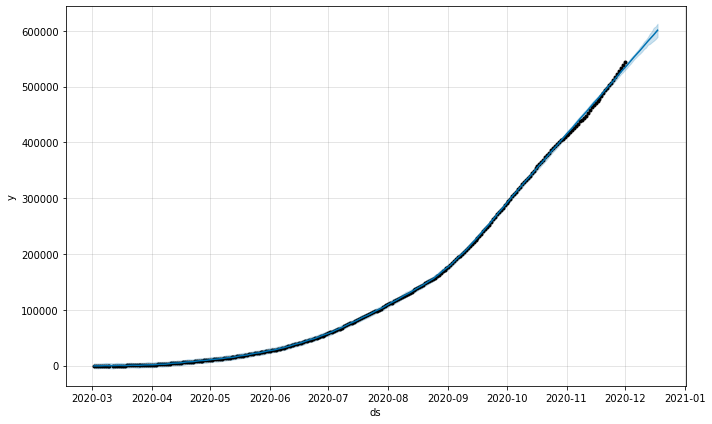

In [ ]:
print(prophet_c.plot(confirmed_forecast))

Figure(648x432)


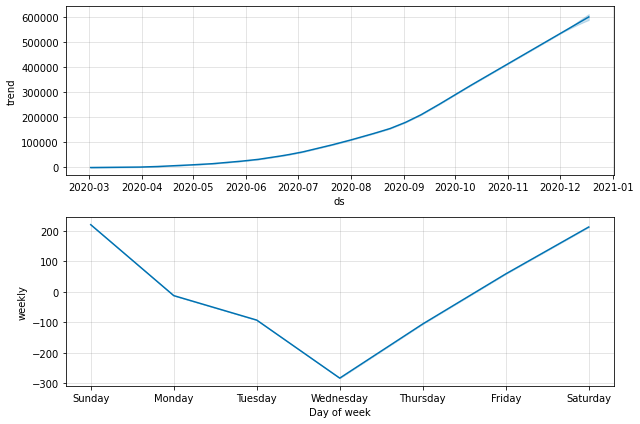

In [ ]:
print(prophet_c.plot_components(confirmed_forecast))

In [ ]:
model_predictions["Prophet's Prediction"]=list(confirmed_forecast["yhat"].tail(17))
model_predictions["Prophet's Upper Bound"]=list(confirmed_forecast["yhat_upper"].tail(17))
model_predictions.head()

,Dates,Prophet's Prediction,Prophet's Upper Bound
0,2020-12-02,537346.192009,541832.163919
1,2020-12-03,541488.975220,545928.452302
2,2020-12-04,545618.196748,550351.657508
3,2020-12-05,549737.260285,554301.917354
4,2020-12-06,553709.990486,557914.850245


In [ ]:
model_scores

[1737.07921522764]

In [ ]:
model_train=datacovid.iloc[:int(datacovid.shape[0]*0.99)]
valid=datacovid.iloc[int(datacovid.shape[0]*0.99):]
y_pred=valid.copy()

In [ ]:
#SARIMA
model_sarima= auto_arima(model_train["Total kasus"],trace=True, error_action='ignore', 
                         start_p=0,start_q=0,max_p=2,max_q=2,m=7,
                   suppress_warnings=True,stepwise=True,seasonal=True)
model_sarima.fit(model_train["Total kasus"])

Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 1, 7); AIC=3832.876, BIC=3847.255, Fit time=0.721 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 7); AIC=3884.016, BIC=3891.205, Fit time=0.024 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 0, 0, 7); AIC=3836.818, BIC=3851.196, Fit time=0.570 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 1, 7); AIC=3841.153, BIC=3855.532, Fit time=0.391 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 1, 7); AIC=3864.493, BIC=3875.277, Fit time=0.244 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(2, 0, 1, 7); AIC=3834.413, BIC=3852.386, Fit time=1.333 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 0, 7); AIC=3856.054, BIC=3866.838, Fit time=0.332 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 2, 7); AIC=3834.399, BIC=3852.372, Fit time=1.681 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(2, 0, 2, 7); AIC=3836.876, BIC=3858.444, Fit time=1.702 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_o

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 2, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(1, 0, 1, 7), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend='c')

In [ ]:
prediction_sarima=model_sarima.predict(len(valid))
y_pred["SARIMA Model Prediction"]=prediction_sarima

In [ ]:
model_scores.append(np.sqrt(mean_squared_error(valid["Total kasus"],y_pred["SARIMA Model Prediction"])))
print("Root Mean Square Error for SARIMA Model: ",np.sqrt(mean_squared_error(valid["Total kasus"],y_pred["SARIMA Model Prediction"])))

Root Mean Square Error for SARIMA Model:  1268.6619294407494


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Total kasus"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Total kasus"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["SARIMA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases SARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
SARIMA_model_new_prediction=[]
for i in range(1,18):
    SARIMA_model_new_prediction.append(model_sarima.predict(len(valid)+i)[-1])
model_predictions["SARIMA Model Prediction"]=SARIMA_model_new_prediction
model_predictions.head()

,Dates,Prophet's Prediction,Prophet's Upper Bound,SARIMA Model Prediction
0,2020-12-02,537346.192009,541832.163919,547979.706894
1,2020-12-03,541488.975220,545928.452302,553453.352537
2,2020-12-04,545618.196748,550351.657508,559119.869966
3,2020-12-05,549737.260285,554301.917354,564768.324901
4,2020-12-06,553709.990486,557914.850245,570024.478417


In [ ]:
model_scores

[1737.07921522764, 1268.6619294407494]

In [ ]:
#Holt's Linear
model_train=datacovid.iloc[:int(datacovid.shape[0]*0.99)]
valid=datacovid.iloc[int(datacovid.shape[0]*0.99):]
y_pred=valid.copy()

In [ ]:
holt=Holt(np.asarray(model_train["Total kasus"])).fit(smoothing_level=0.4, smoothing_slope=0.4,optimized=False) 

In [ ]:
y_pred["Holt"]=holt.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred["Total kasus"],y_pred["Holt"])))
print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(y_pred["Total kasus"],y_pred["Holt"])))

Root Mean Square Error Holt's Linear Model:  1395.2254462273243


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Total kasus"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Total kasus"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Holt"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases Holt's Linear Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()


In [ ]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
    holt_new_date.append(datacovid.index[-1]+timedelta(days=i))
    holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])

model_predictions["Holt's Linear Model Prediction"]=holt_new_prediction
model_predictions.head()

,Dates,Prophet's Prediction,Prophet's Upper Bound,SARIMA Model Prediction,Holt's Linear Model Prediction
0,2020-12-02,537346.192009,541832.163919,547979.706894,548134.845788
1,2020-12-03,541488.975220,545928.452302,553453.352537,553360.275944
2,2020-12-04,545618.196748,550351.657508,559119.869966,558585.706100
3,2020-12-05,549737.260285,554301.917354,564768.324901,563811.136256
4,2020-12-06,553709.990486,557914.850245,570024.478417,569036.566412


In [ ]:
model_predictions.drop(model_predictions[["Prophet's Upper Bound"]],1,inplace=True)
model_predictions

,Dates,Prophet's Prediction,SARIMA Model Prediction,Holt's Linear Model Prediction
0,2020-12-02,537346.192009,547979.706894,548134.845788
1,2020-12-03,541488.975220,553453.352537,553360.275944
2,2020-12-04,545618.196748,559119.869966,558585.706100
3,2020-12-05,549737.260285,564768.324901,563811.136256
4,2020-12-06,553709.990486,570024.478417,569036.566412
5,2020-12-07,557442.495223,574928.479590,574261.996567
6,2020-12-08,561327.327856,580067.875161,579487.426723
7,2020-12-09,565102.144525,585661.289219,584712.856879
8,2020-12-10,569244.927736,591350.814260,589938.287035
9,2020-12-11,573374.149265,597228.706459,595163.717190


In [ ]:
model_names=["Facebook's Prophet Model","SARIMA Model","Holt's Linear"]
model_summary=pd.DataFrame(zip(model_names,model_scores),columns=["Model Name","Root Mean Squared Error"]).sort_values(["Root Mean Squared Error"])
model_summary

,Model Name,Root Mean Squared Error
1,SARIMA Model,1268.661929
2,Holt's Linear,1395.225446
0,Facebook's Prophet Model,1737.079215


In [ ]:
df = pd.DataFrame(model_names,columns=['nama_modelml'])
nomor=df[df['nama_modelml'] == "SARIMA Model"].index[0]
df

,nama_modelml
0,Facebook's Prophet Model
1,SARIMA Model
2,Holt's Linear


In [ ]:
df['nama_modelml'].values[-1]

"Holt's Linear"

In [ ]:
figml = go.Figure()

#Total Kasus
figml.add_trace(go.Scatter(x = model_predictions['Dates'], y = model_predictions["SARIMA Model Prediction"],
                  name='Prediksi', mode='lines'))

figml.add_trace(go.Scatter(x = datacovid.index, y = datacovid['Total kasus'],
                  name='Total Kasus Positif', mode='lines'))
figml.update_layout(showlegend=True, xaxis_title="Tanggal",yaxis_title="Jumlah Kasus",hovermode='x',legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

figml.show()


In [ ]:
datacovid.tail()

,Kasus baru,Kasus Impor,Kasus Lokal,Total kasus,Kasus aktif,% kasus aktif,Sembuh\n(baru),Sembuh,Tingkat kesembuhan (seluruh kasus),Tingkat kesembuhan (closed cases),Meninggal\n(baru),Meninggal\nDunia,Tingkat kematian (seluruh kasus),Tingkat kematian (closed cases),PDP,ODP,Suspek aktif,Jumlah spesimen diperiksa (dari 1 April),Jumlah orang diperiksa,Negatif,Positif \n(=C),Dalam Proses,Spesimen,Orang yang dites,Jumlah test/juta penduduk,Test/Positif,Jumlah org yg dites / positif,Jumlah Test/Positif harian,Positif / Jumlah Tes,Positive rate harian,Case Growth Rate,Positive rate mingguan,Jumlah spesimen diperiksa (rata-rata 7 hari),Jumlah orang diperiksa (rata-rata 7 hari),Rasio spesimen/orang diperiksa (rata-rata 7 hari),Unnamed: 36,Test PCR Orang Nasional Rata-rata 7 hari,Pos Rate Nasional - rata-rata 7 hari,Test Orang DKI,Positif DKI,Unnamed: 41,Pos Rate DKI,Pos Rate DKI - 7 harian,NON DKI,Positif Non DKI,Unnamed: 46,Pos Rate Non DKI,Pos Rate Non DKI - 7 harian,Days Since
tanggal,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-11-27,"5,828",nan,nan,522581,"68,604",13.13%,"3,807","437,456",83.71%,96.36%,169,"16,521",3.16%,3.64%,NaN,NaN,"67,836","5,566,215","3,729,561","3,206,980",NaN,nan,"48,823","39,435","13,813",10.650000,7.140000,6.77,14.01%,14.78%,1.13%,14.68%,"43,541","33,360",1.310000,nan,nan,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270 days
2020-11-28,"5,418",nan,nan,527999,"69,370",13.14%,"4,527","441,983",83.71%,96.37%,125,"16,646",3.15%,3.63%,NaN,NaN,"68,606","5,612,789","3,766,860","3,238,861",NaN,nan,"46,574","37,299","13,951",10.630000,7.130000,6.88,14.02%,14.53%,1.04%,14.44%,"44,034","34,322",1.280000,nan,nan,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,271 days
2020-11-29,"6,267",nan,nan,534266,"71,658",13.41%,"3,810","445,793",83.44%,96.37%,169,"16,815",3.15%,3.63%,NaN,NaN,"70,792","5,655,692","3,797,881","3,263,615",NaN,nan,"42,903","31,021","14,066",10.590000,7.110000,4.95,14.07%,20.20%,1.19%,14.95%,"45,022","34,963",1.290000,nan,nan,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,272 days
2020-11-30,"4,617",nan,nan,538883,"71,420",13.25%,"4,725","450,518",83.60%,96.38%,130,"16,945",3.14%,3.62%,NaN,NaN,"72,786","5,695,747","3,827,720","3,288,837",NaN,nan,"40,055","29,839","14,177",10.570000,7.100000,6.46,14.08%,15.47%,0.86%,14.87%,"45,018","35,321",1.270000,nan,nan,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,273 days
2020-12-01,"5,092",nan,nan,543975,"72,015",13.24%,"4,361","454,879",83.62%,96.38%,136,"17,081",3.14%,3.62%,NaN,NaN,"71,286","5,746,978","3,865,412","3,321,437",NaN,nan,"51,231","37,692","14,316",10.560000,7.110000,7.4,14.07%,13.51%,0.94%,14.65%,"46,627","36,738",1.270000,nan,nan,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274 days


In [ ]:
y_pred

,Kasus baru,Kasus Impor,Kasus Lokal,Total kasus,Kasus aktif,% kasus aktif,Sembuh\n(baru),Sembuh,Tingkat kesembuhan (seluruh kasus),Tingkat kesembuhan (closed cases),Meninggal\n(baru),Meninggal\nDunia,Tingkat kematian (seluruh kasus),Tingkat kematian (closed cases),PDP,ODP,Suspek aktif,Jumlah spesimen diperiksa (dari 1 April),Jumlah orang diperiksa,Negatif,Positif \n(=C),Dalam Proses,Spesimen,Orang yang dites,Jumlah test/juta penduduk,Test/Positif,Jumlah org yg dites / positif,Jumlah Test/Positif harian,Positif / Jumlah Tes,Positive rate harian,Case Growth Rate,Positive rate mingguan,Jumlah spesimen diperiksa (rata-rata 7 hari),Jumlah orang diperiksa (rata-rata 7 hari),Rasio spesimen/orang diperiksa (rata-rata 7 hari),Unnamed: 36,Test PCR Orang Nasional Rata-rata 7 hari,Pos Rate Nasional - rata-rata 7 hari,Test Orang DKI,Positif DKI,Unnamed: 41,Pos Rate DKI,Pos Rate DKI - 7 harian,NON DKI,Positif Non DKI,Unnamed: 46,Pos Rate Non DKI,Pos Rate Non DKI - 7 harian,Days Since,Holt
tanggal,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-11-29,"6,267",nan,nan,534266,"71,658",13.41%,"3,810","445,793",83.44%,96.37%,169,"16,815",3.15%,3.63%,NaN,NaN,"70,792","5,655,692","3,797,881","3,263,615",NaN,nan,"42,903","31,021","14,066",10.590000,7.110000,4.95,14.07%,20.20%,1.19%,14.95%,"45,022","34,963",1.290000,nan,nan,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,272 days,532458.555321
2020-11-30,"4,617",nan,nan,538883,"71,420",13.25%,"4,725","450,518",83.60%,96.38%,130,"16,945",3.14%,3.62%,NaN,NaN,"72,786","5,695,747","3,827,720","3,288,837",NaN,nan,"40,055","29,839","14,177",10.570000,7.100000,6.46,14.08%,15.47%,0.86%,14.87%,"45,018","35,321",1.270000,nan,nan,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,273 days,537683.985477
2020-12-01,"5,092",nan,nan,543975,"72,015",13.24%,"4,361","454,879",83.62%,96.38%,136,"17,081",3.14%,3.62%,NaN,NaN,"71,286","5,746,978","3,865,412","3,321,437",NaN,nan,"51,231","37,692","14,316",10.560000,7.110000,7.4,14.07%,13.51%,0.94%,14.65%,"46,627","36,738",1.270000,nan,nan,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274 days,542909.415633


# Part 4: Web-app dengan Dash Library

In [ ]:
!pip install jupyter-dash

import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

nama_model = df['nama_modelml'].unique()
case_total = datacovid['Total kasus'].values[-1]
case_baru= datacovid['Kasus baru'].values[-1]
case_aktif= datacovid['Kasus aktif'].values[-1]
case_sembuh= datacovid['Sembuh'].values[-1]
case_meninggal= datacovid['Meninggal\nDunia'].values[-1]
x = datacovid.index.values[-1] 
t= pd.to_datetime(str(x)) 
tanggal_hari_ini = t.strftime('%A, %d %B %Y')

edit = {
    'background': '#F9F8FD',
    'text': '#323232',
    'box': '#F9F9F9'
}
# Build App
app = JupyterDash(__name__,external_stylesheets=external_stylesheets)

app.layout = html.Div(className="row",style={'backgroundColor': edit['background'],'color': edit['text'],},children=[
    html.Div(style={'padding':'30px 20px 0px 60px','margin':'0px 0px 10px 0px','color':'#0E1012'},children=[
    html.H1(style={'font-size': '30px'},children='Covid-19 Dashboard')]),



html.Div(className="row",children=[
  html.Div(className='three columns',children=[html.Div(style={'font-size':'20px','color':'#FFFFFF'} ,children=tanggal_hari_ini),html.Div(style={'font-weight':'1px','color':'#FFFFFF'} ,children='Tanggal Pembaharuan Data')],style={'padding':'10px','border-radius':'10px','margin':'10px','backgroundColor':'#2E2E2E','box-shadow': '0 4px 8px 0 rgba(0, 0, 0, 0.2)'}),
    html.Div(className='two columns',children=[html.Div(style={'font-size':'30px',} ,children=case_baru),html.Div(style={'font-weight':'1px','color':'#5E637C'} ,children='Kasus Baru')],style={'padding':'10px','border-radius':'10px','margin':'10px','backgroundColor':'#EBE6FF','box-shadow': '0 4px 8px 0 rgba(0, 0, 0, 0.2)'}),
     html.Div(className='two columns',children=[html.Div(style={'font-size':'30px',} ,children=case_total),html.Div(style={'font-weight':'1px','color':'#5E637C'} ,children='Terkonfirmasi')],style={'padding':'10px','border-radius':'10px','margin':'10px','backgroundColor':'#FFFFFF','box-shadow': '0 4px 8px 0 rgba(0, 0, 0, 0.2)'}),
      html.Div(className='two columns',children=[html.Div(style={'font-size':'30px',} ,children=case_aktif),html.Div(style={'font-weight':'1px','color':'#5E637C'} ,children='Kasus Aktif')],style={'padding':'10px','border-radius':'10px','margin':'10px','backgroundColor':'#FFF1D8','box-shadow': '0 4px 8px 0 rgba(0, 0, 0, 0.2)'}),
       html.Div(className='two columns',children=[html.Div(style={'font-size':'30px',} ,children=case_sembuh),html.Div(style={'font-weight':'1px','color':'#5E637C'} ,children='Sembuh')],style={'padding':'10px','border-radius':'10px','margin':'10px','backgroundColor':'#CEFFDD','box-shadow': '0 4px 8px 0 rgba(0, 0, 0, 0.2)'}),
        html.Div(className='two columns',children=[html.Div(style={'font-size':'30px',} ,children=case_meninggal),html.Div(style={'font-weight':'1px','color':'#5E637C',} ,children='Meninggal Dunia')],style={'padding':'10px','border-radius':'10px','margin':'10px','backgroundColor':'#FE9B87','box-shadow': '0 4px 8px 0 rgba(0, 0, 0, 0.2)'}),


],style={'padding':'1px 5px 1px 5px','margin':'0px 60px 20px 50px'}),


 


    html.Div([dcc.Graph(
        id='graph-1',
        figure=fig11,style={'height':'70vh'}
    )],style={'padding':'0px 10px 0px 0px','margin':'10px 60px 20px 60px','backgroundColor':'#FFFFFF','border-radius':'15px','box-shadow': '0 4px 8px 0 rgba(0, 0, 0, 0.2)'}),



html.Div(className="row",children=[
    html.Div(className='six columns',children=[dcc.Graph(
        id='graph-2',
        figure=fig1,style={'height':'70vh'}
    )],style={'padding':'1px 5px 1px 5px','border-radius':'10px','margin':'10px','backgroundColor':'#FFFFFF','box-shadow': '0 4px 8px 0 rgba(0, 0, 0, 0.2)'}),

    html.Div(className='six columns',children=[dcc.Graph(
        id='graph-province',
        figure=fig10,style={'height':'70vh'}
    )],style={'padding':'1px 5px 1px 5px','border-radius':'10px','margin':'10px','backgroundColor':'#FFFFFF','box-shadow': '0 4px 8px 0 rgba(0, 0, 0, 0.2)'}),
],style={'padding':'1px 5px 1px 5px','margin':'10px 60px 20px 60px'}),


 html.Div(className='row',children=[
     html.Div(className='four columns',children=[dcc.Graph(
        id='graph-3',
        figure=fig2,style={'height':'70vh'}
    )],style={'padding':'10px 5px 1px 5px','border-radius':'10px','backgroundColor':'#FFFFFF','margin':'10px','box-shadow': '0 4px 8px 0 rgba(0, 0, 0, 0.2)'}),

     html.Div(className='four columns',children=[dcc.Graph(
        id='graph-4',
        figure=fig3,style={'height':'70vh'}
    )],style={'padding':'10px 5px 1px 5px','border-radius':'10px','backgroundColor':'#FFFFFF','margin':'10px','box-shadow': '0 4px 8px 0 rgba(0, 0, 0, 0.2)'}),
 

     html.Div(className='four columns',children=[dcc.Graph(
        id='graph-5',
        figure=fig4,style={'height':'70vh'}
    )],style={'padding':'10px 5px 1px 5px','border-radius':'10px','backgroundColor':'#FFFFFF','margin':'10px','box-shadow': '0 4px 8px 0 rgba(0, 0, 0, 0.2)'})
],style={'padding':'1px 5px 1px 5px','margin':'10px 20px 20px 60px'}),


html.Div(className="row",children=[
    html.Div(children=[dcc.Graph(
        id='graph-persentase',
        figure=fig_persentase,style={'height':'70vh'}
    )],style={'padding':'10px 5px 1px 5px','border-radius':'10px','margin':'10px','backgroundColor':'#FFFFFF','box-shadow': '0 4px 8px 0 rgba(0, 0, 0, 0.2)'})
],style={'padding':'1px 5px 1px 5px','margin':'10px 70px 20px 60px'}),


html.Div(style={'padding':'1px 5px 1px 5px','margin':'30px 0px 0px 80px'},children=[
    html.H2(style={'text-align': 'left','color': '#5E637C','font-size':'20px'} ,children='Informasi Tes Covid')]),


    html.Div([dcc.Graph(
        id='graph-tes',
        figure=fig5,style={'height':'70vh'}
    ),dcc.Graph(
        id='graph-6',
        figure=fig8,style={'height':'50vh'}
    ),dcc.Graph(
        id='graph-7',
        figure=fig9,style={'height':'50vh'}
    ),dcc.Graph(
        id='graph-8',
        figure=fig6,style={'height':'50vh'}
    ),dcc.Graph(
        id='graph-9',
        figure=fig7,style={'height':'50vh'}
    )],style={'padding':'1px 5px 1px 5px','border-radius':'10px','margin':'0px 80px 20px 75px','backgroundColor':'#FFFFFF','box-shadow': '0 4px 8px 0 rgba(0, 0, 0, 0.2)'}),  
    
    html.Div(style={'padding':'1px 5px 1px 5px','margin':'50px 0px 0px 80px'},children=[
    html.H2(style={'text-align': 'left','color': '#5E637C','font-size':'20px'} ,children='Prediksi dengan Machine Learning Model')]),

    html.Div([

        html.Div([
        html.Label(children='Pilih Model Machine Learning'),dcc.Dropdown(id='pilih_model',
        options=[{'label': i, 'value': i} for i in nama_model],
        value="Holt's Linear")],style={'padding':'20px 20px 5px 20px'}),
        
        dcc.Graph(id='graphml'),],style={'padding':'1px 5px 1px 5px','border-radius':'10px','margin':'0px 80px 20px 75px','backgroundColor':'#FFFFFF','box-shadow': '0 4px 8px 0 rgba(0, 0, 0, 0.2)'}),
    
    html.Div(style={'height:':'100px','padding':'80px 80px 80px 80px','margin':'50px 0px 0px 0px'},children=[
    html.Div(style={'text-align': 'center','color': '#000000'} ,children='Adrian Stanislaus | David Millenov | Wildan Rahadian')]),
])

@app.callback(
    Output('graphml', 'figure'),
    [Input('pilih_model', 'value')])
def update_figure(modelnya):
  nomor = df[df['nama_modelml'] == modelnya].index[0]
  nama = model_predictions.columns[nomor+1]
  
  figml = go.Figure()

#Total Kasus
  figml.add_trace(go.Scatter(x = model_predictions['Dates'], y = model_predictions[nama],
                  name='Prediksi', mode='lines+markers'))

  figml.add_trace(go.Scatter(x = datacovid.index, y = datacovid["Total kasus"],
                  name='Total Kasus', mode='lines+markers'))
  
  figml.update_layout(showlegend=True, xaxis_title="Tanggal",yaxis_title="Jumlah Kasus",hovermode='x',margin=dict(l=20, r=20, t=20, b=20),legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
  ))

  figml.update_layout(transition_duration=500)

  return figml

# Run app and display result inline in the notebook
app.run_server(mode='external',host="0.0.0.0",port=1005)

     |████████████████████████████████| 51kB 2.9MB/s 
     |████████████████████████████████| 81kB 3.9MB/s 
     |████████████████████████████████| 1.0MB 22.5MB/s 
     |████████████████████████████████| 3.5MB 45.8MB/s 
     |████████████████████████████████| 194kB 44.6MB/s 
     |████████████████████████████████| 1.8MB 46.7MB/s 
     |████████████████████████████████| 358kB 39.3MB/s 
  Created wheel for dash: filename=dash-1.17.0-cp36-none-any.whl size=83728 sha256=1dbefe346fdbfeb906cdbf97407560b3b3513bff0e819187c652adb33a2ae35c
  Stored in directory: /root/.cache/pip/wheels/e0/32/13/8a569b638a79cf80a4a721f56040d91198adec28e3bc8123fc
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-cp36-none-any.whl size=1013944 sha256=51563ddcafef843a95635568057606064320b70edd2cd1c42f62ba883ca1aa98
  Stored in directory: /root/.cache/pip/wheels/cf/2b/5f/0928a6d1b7ebf280f21a2e925f36d662e6ba83e00b82c6b6bf
  Created wheel for dash-core-components: filename=dash_core_components-1.13.0-cp36

<IPython.core.display.Javascript object>